In [6]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(0, '../snow_terrain_tiles/')
from dem_utils import recursive_rastersstats_to_dict
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import matplotlib.gridspec as gridspec
from skimage.measure import profile_line

In [41]:
from matplotlib import lines
lsd = list(lines.lineStyles.keys())
lsd += lsd
lsd.remove('None')
lsd.remove('None')
lsd.remove('')
lsd.remove('')
lsd.remove(' ')
lsd.remove(' ')
lsd

['-', '--', '-.', ':', '-', '--', '-.', ':']

In [5]:
d = recursive_rastersstats_to_dict('../subsets/clpx_lake_e/raster/snow_depth/', '*depth*')
print([a.split('/')[-1] for a in d.keys()])
print(len(d))

['clpx_lake_e_snow_depth_2016.tif', 'clpx_lake_e_snow_depth_2015.tif', 'clpx_lake_e_snow_depth_2018.tif', 'clpx_lake_e_snow_depth_2017.tif', 'clpx_lake_e_snow_depth_2012.tif', 'clpx_lake_e_snow_depth_2013.tif']
6


In [46]:
d_dem = recursive_rastersstats_to_dict('../subsets/clpx_lake_e/raster/dem/', '*dem*')
dem = d_dem['../subsets/clpx_lake_e/raster/dem/clpx_lake_e_dem.tif']['arr']

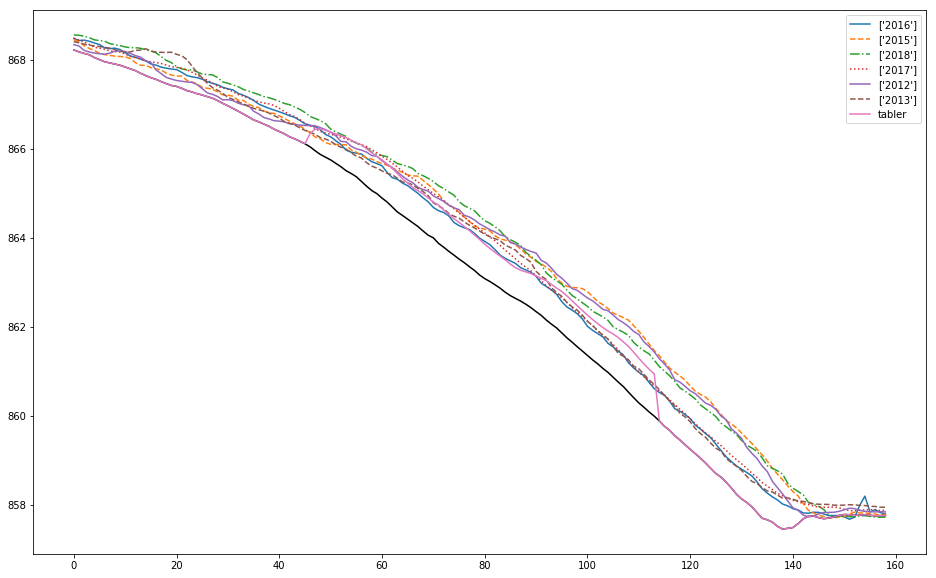

In [66]:
i=0
plt.figure(figsize=(16, 10))
for k in d.keys():
    d[k]['surface'] = d[k]['arr'] + dem
    d[k]['xsection'] = profile_line(d[k]['surface'], (449, 550), (300, 500), order=2)
    plt.plot(d[k]['xsection'], label=d[k]['year'], ls = lsd[i])
    
    i += 1
dem_prof = profile_line(dem, (449, 550), (300, 500), order=2)    
plt.plot(dem_prof, 'k')
plt.plot(tabler(dem_prof), label='tabler')
plt.legend()

In [54]:
yrs = []
fluxs = []
for k in d.keys():
    d[k]['flux'] = np.trapz(d[k]['xsection'] - dem_prof)
    fluxs.append(d[k]['flux'])
    yrs.append(d[k]['year'][0])
    
    

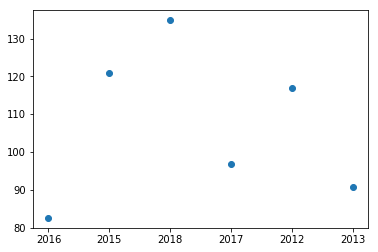

In [56]:
plt.scatter(yrs, fluxs)

In [58]:
def tabler(dem_profile):

    dynamic_tabler = dem_profile.copy()
    i = 45
    while i < len(dem_profile) - 46:

        upwind_0_45 = dem_profile[i - 45] - dem_profile[i]

        snow_to_ground = dynamic_tabler[i] - dem_profile[i + 5]

        downwind_15_30 = dem_profile[i + 15] - dem_profile[i + 30]

        downwind_30_45 = dem_profile[i + 30] - dem_profile[i + 45]

        if upwind_0_45 > 0:
            x1 = (upwind_0_45 / 45) * -100
        else:
            x1 = (upwind_0_45 / 45) * 100

        if snow_to_ground > 0:
            x2 = snow_to_ground * -100
        else:
            x2 = snow_to_ground * 100                    

        if downwind_15_30 > 0:
            x3 = (downwind_15_30 / 15) * -100
        else:
            x3 = (downwind_15_30 / 15) * 100

        if downwind_30_45 > 0:
            x4 = (downwind_30_45 / 15) * -100
        else:
            x4 = (downwind_30_45 / 15) * 100

        y = (0.25 * x1) + (0.55 * x2) + (0.15 * x3) + (0.05 * x4)

        rise = y / 100

        dynamic_tabler[i + 1] = dem_profile[i] - rise

        i += 1
        
    return dynamic_tabler

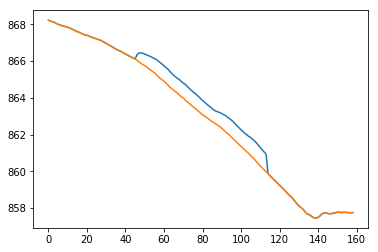

In [61]:
plt.plot(tabler(dem_prof))
plt.plot(dem_prof)

In [64]:
help(profile_line)

Help on function profile_line in module skimage.measure.profile:

profile_line(image, src, dst, linewidth=1, order=1, mode='constant', cval=0.0)
    Return the intensity profile of an image measured along a scan line.
    
    Parameters
    ----------
    image : numeric array, shape (M, N[, C])
        The image, either grayscale (2D array) or multichannel
        (3D array, where the final axis contains the channel
        information).
    src : 2-tuple of numeric scalar (float or int)
        The start point of the scan line.
    dst : 2-tuple of numeric scalar (float or int)
        The end point of the scan line. The destination point is *included*
        in the profile, in contrast to standard numpy indexing.
    linewidth : int, optional
        Width of the scan, perpendicular to the line
    order : int in {0, 1, 2, 3, 4, 5}, optional
        The order of the spline interpolation to compute image values at
        non-integer coordinates. 0 means nearest-neighbor interpolat

In [24]:
for k in d.keys():
    print(k)
    print(d[k]['depth threshold'])
    print(d[k]['pct of mean threshold'])
    print('-------------')

../depth_dDEMs/hv/corrected/hv_depth_103_2013_corrected_-0.03_m.tif
0.7131321370601653
129.99999999999997
-------------
../depth_dDEMs/hv/corrected/hv_depth_098_2015_corrected_0.18_m.tif
0.8486932754516602
120.0
-------------
../depth_dDEMs/hv/corrected/hv_depth_103_2018_corrected_-0.08_m.tif
0.6818377435207367
140.0
-------------
../depth_dDEMs/hv/corrected/hv_depth_096_2016_corrected_0.00_m.tif
0.627915358543396
120.0
-------------
../depth_dDEMs/hv/corrected/hv_depth_102_2017_corrected_-0.05_m.tif
0.7470900297164916
140.0
-------------
../depth_dDEMs/hv/corrected/hv_depth_107_2012_corrected_-0.04_m.tif
0.57768394947052
120.0
-------------
../depth_dDEMs/clpx/corrected/clpx_depth_105_2018_corrected_0.25_m.tif
0.81641446352005
140.0
-------------
../depth_dDEMs/clpx/corrected/clpx_depth_096_2016_corrected_0.38_m.tif
0.6011867016553878
129.99999999999997
-------------
../depth_dDEMs/clpx/corrected/clpx_depth_102_2013_corrected_0.21_m.tif
0.6827264606952667
129.99999999999997
----------

In [59]:
for k in d.keys():
    df = d[k]['threshold test results']
    t = d[k]['pct of mean threshold']
    d[k]['Drift Area %'] = df.loc[t]['Drift Area pct.']
    d[k]['Drift Volume %'] = df.loc[t]['Drift Volume pct.']
    d[k]['Drift Area'] = df.loc[t]['drift_area']
    d[k]['Drift Volume'] = df.loc[t]['drift_volume']


In [42]:
d

{'../depth_dDEMs/hv/corrected/hv_depth_103_2013_corrected_-0.03_m.tif': {'arr': array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
  'mu': 0.5485632,
  'sigma': 0.30103767,
  'kurt': nan,
  'skew': masked_array(data=3.08528987,
               mask=False,
         fill_value=1e+20),
  'CV': 0.54877484,
  'profile': {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 3400, 'height': 15400, 'count': 1, 'crs': CRS.from_dict(init='epsg:32606'), 'transform': Affine(1.0, 0.0, 421000.0,
         0.0, -1.0, 7678000.0), 'tiled': False, 'interleave': 'band'},
  'year': ['2013'],
  'total area': 20682838,
  'total volume': 11345844.0,
  'pct of mean threshold': 129.99999999999997,
  'depth threshold': 0.7131321370601653,
  'threshol

In [96]:
fldarea = [k.split('/')[2] for k in d.keys()] 
year = [d[k]['year'][0] for k in d.keys()]
dareas = [d[k]['Drift Area %'] for k in d.keys()]
dvols = [d[k]['Drift Volume %'] for k in d.keys()]
dareamag = [d[k]['Drift Area'] / 1000000 for k in d.keys()]
dvolmag = [d[k]['Drift Volume'] for k in d.keys()]
pctthresh = [d[k]['pct of mean threshold'] for k in d.keys()]
dthresh = [d[k]['depth threshold'] for k in d.keys()]
mus = [d[k]['mu'] for k in d.keys()]
sigs = [d[k]['sigma'] for k in d.keys()]
cvs = [d[k]['CV'] for k in d.keys()]
tareas = [d[k]['total area'] / 1000000 for k in d.keys()]

tuples = list(zip(fldarea, year))
tuples

[('hv', '2013'),
 ('hv', '2015'),
 ('hv', '2018'),
 ('hv', '2016'),
 ('hv', '2017'),
 ('hv', '2012'),
 ('clpx', '2018'),
 ('clpx', '2016'),
 ('clpx', '2013'),
 ('clpx', '2017'),
 ('clpx', '2015'),
 ('clpx', '2012')]

In [106]:
index = pd.MultiIndex.from_tuples(tuples, names=['Field Area', 'Year'])
df = pd.DataFrame(index=index)
df['Field Area'] = fldarea
df['Year'] = year
df['Drift Area [% total]'] = dareas
df['Drift Volume [% total]'] = dvols
df['Drift Area [km^2]'] = dareamag
df['Drift Volume [m^3]'] = dvolmag
df['Drift Threshold [% of mean depth]'] = pctthresh
df['Drift Threshold [m]'] = dthresh
df['Mean Depth [m]'] = mus
df['SD Depth [m]'] = sigs
df['CV Depth'] = cvs
df['Total Area [km^2]'] = tareas

df['Area Normalized Drift Volume [m^3/km^2]'] = df['Drift Volume [m^3]'] / df['Total Area [km^2]']

df = df.round(2)
df

Field Area  Year  Drift Area [% total]  \
Field Area Year                                          
hv         2013         hv  2013                 19.20   
           2015         hv  2015                 17.54   
           2018         hv  2018                 20.00   
           2016         hv  2016                 19.40   
           2017         hv  2017                 15.40   
           2012         hv  2012                 23.48   
clpx       2018       clpx  2018                 20.28   
           2016       clpx  2016                 20.79   
           2013       clpx  2013                 16.96   
           2017       clpx  2017                 18.17   
           2015       clpx  2015                 21.57   
           2012       clpx  2012                 18.70   

                 Drift Volume [% total]  Drift Area [km^2]  \
Field Area Year                                              
hv         2013                   34.48               3.97   
           2015                   26.37               5.00   
           2018                   40.71               5.59   
           2016                   29.36               5.09   
           2017                   30.66               4.29   
           2012                   41.23               4.45   
clpx       2018                   38.20              19.03   
           2016                   34.24              19.38   
           2013                   26.24              13.36   
           2017                   33.07              17.14   
           2015                   38.38              20.59   
           2012                   37.30              14.42   

                 Drift Volume [m^3]  Drift Threshold [% of mean depth]  \
Field Area Year                                                          
hv         2013           3911711.0                              130.0   
           2015           5321696.0                              120.0   
           2018           5542494.0                              140.0   
           2016           4034082.0                              120.0   
           2017           4555608.0                              140.0   
           2012           3761374.0                              120.0   
clpx       2018          20903926.0                              140.0   
           2016          14761273.0                              130.0   
           2013          10851596.0                              130.0   
           2017          15538119.0                              140.0   
           2015          19925392.0                              140.0   
           2012          10365577.0                              150.0   

                 Drift Threshold [m]  Mean Depth [m]  SD Depth [m]  CV Depth  \
Field Area Year                                                                
hv         2013                 0.71            0.55          0.30      0.55   
           2015                 0.85            0.71          0.25      0.35   
           2018                 0.68            0.49          0.36      0.73   
           2016                 0.63            0.52          0.21      0.41   
           2017                 0.75            0.53          0.32      0.60   
           2012                 0.58            0.48          0.29      0.61   
clpx       2018                 0.82            0.58          0.59      1.01   
           2016                 0.60            0.46          0.23      0.49   
           2013                 0.68            0.53          0.20      0.39   
           2017                 0.70            0.50          0.27      0.55   
           2015                 0.76            0.54          0.32      0.59   
           2012                 0.54            0.36          0.24      0.68   

                 Total Area [km^2]  Area Normalized Drift Volume [m^3/km^2]  
Field Area Year                                                              
hv         2013     

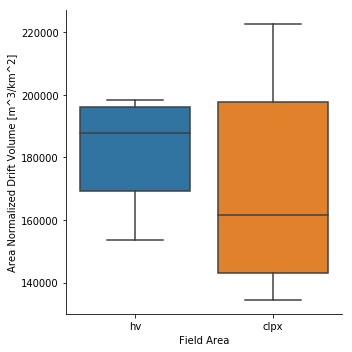

In [103]:
sns.catplot(x="Field Area", y="Area Normalized Drift Volume [m^3/km^2]", kind="box", data=df);

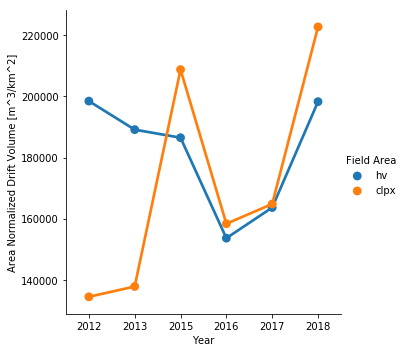

In [105]:
sns.catplot(x="Year", y="Area Normalized Drift Volume [m^3/km^2]", hue="Field Area", kind="point", data=df);

In [107]:
df.to_csv('drift_threshold_results_full_domains.csv')

In [88]:
sns.relplot(x="Drift Area [% total]", y="Drift Volume [% total]", hue="Field Area", data=df);

ValueError: Could not interpret input 'Field Area'